In [1]:
from pandas_datareader import data as pdr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
import yfinance as yf
yf.pdr_override()

In [3]:
df = pdr.get_data_yahoo("TSLA")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-09-21,257.850006,260.859985,254.210007,255.699997,255.699997,119531000
2023-09-22,257.399994,257.790009,244.479996,244.880005,244.880005,127024300
2023-09-25,243.380005,247.100006,238.309998,246.990005,246.990005,104636600


<Axes: xlabel='Date'>

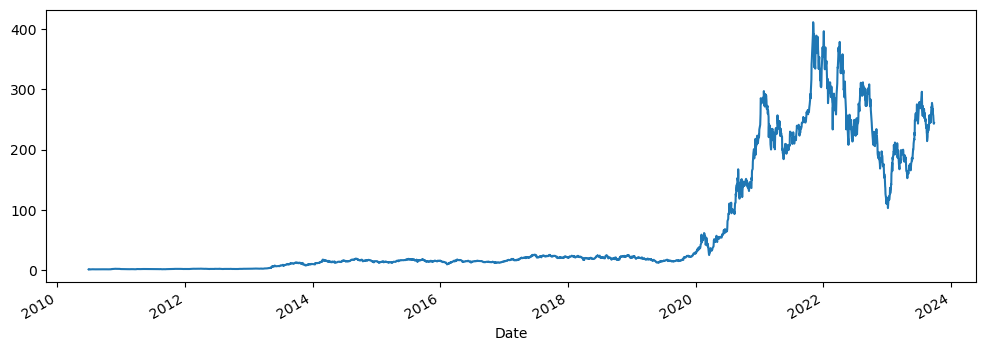

In [4]:
df["Open"].plot(figsize = (12,4))

In [5]:
# simple moving average

df["Open:10 days rolling"] = df["Open"].rolling(window=10,min_periods = 1).mean()

<Axes: xlabel='Date'>

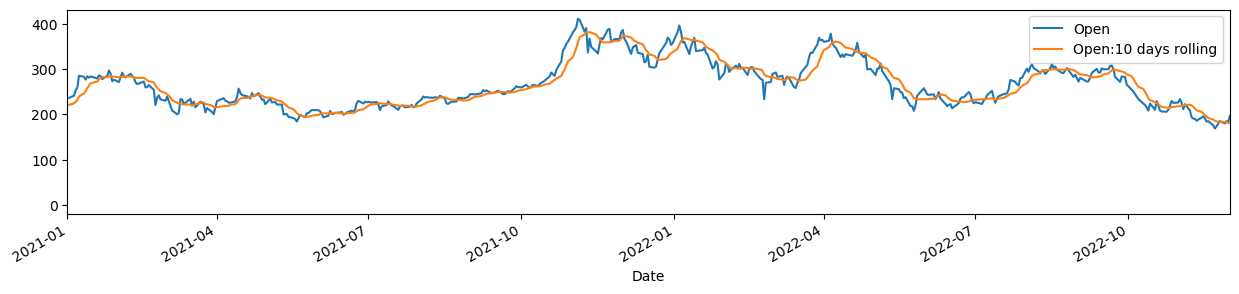

In [6]:
df[["Open","Open:10 days rolling"]].plot(xlim = ["2021-01-01","2022-12-01"],figsize = (15,3))

In [7]:
df["Open:30 days rolling"] = df["Open"].rolling(window=30,min_periods = 1).mean()
df["Open:50 days rolling"] = df["Open"].rolling(window=50,min_periods = 1).mean()
df["Open:70 days rolling"] = df["Open"].rolling(window=70,min_periods = 1).mean()

<Axes: xlabel='Date'>

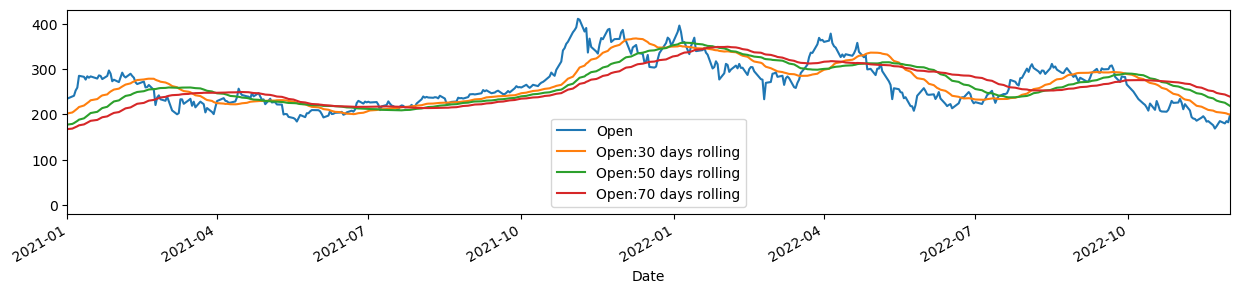

In [8]:
df[["Open","Open:30 days rolling","Open:50 days rolling","Open:70 days rolling"]].plot(xlim = ["2021-01-01","2022-12-01"],figsize = (15,3))

<Axes: xlabel='Date'>

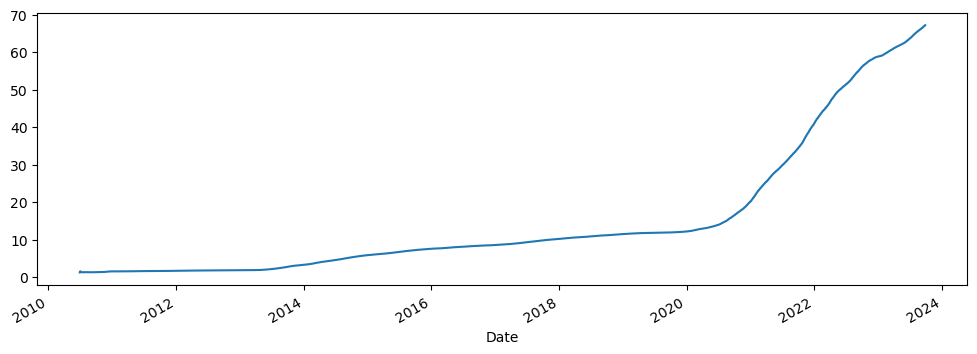

In [9]:
# Expanding
# cumalative moving average

df["Open"].expanding().mean().plot(figsize = (12,4))

In [10]:
# exponential weighted moving average :-EWMA

df["ema_0.1"] = df["Open"].ewm(alpha=0.1,adjust=False).mean()

In [11]:
df["ema_0.3"] = df["Open"].ewm(alpha=0.3,adjust=False).mean()
df["ema_0.5"] = df["Open"].ewm(alpha=0.5,adjust=False).mean()

<Axes: xlabel='Date'>

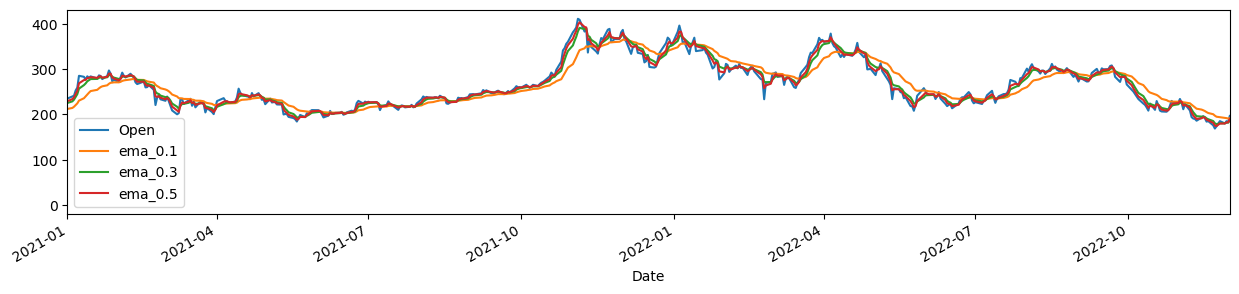

In [12]:
df[["Open","ema_0.1","ema_0.3","ema_0.5"]].plot(xlim = ["2021-01-01","2022-12-01"],figsize = (15,3))

In [13]:
df["ema_5days"] = df["Open"].ewm(span=5).mean()

<Axes: xlabel='Date'>

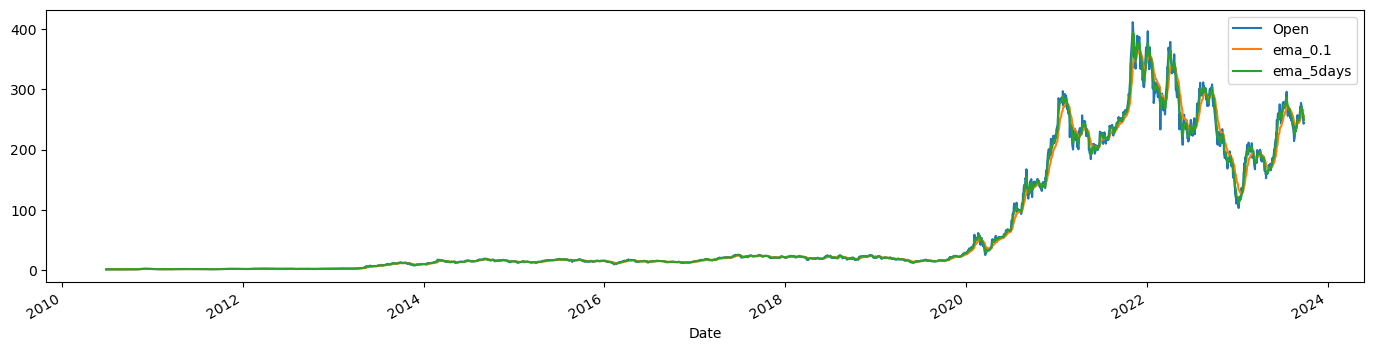

In [14]:
df[["Open","ema_0.1","ema_5days"]].plot(figsize = (17,4))

In [15]:
import numpy as np
import statsmodels.api as sms

In [16]:
df_airline = pd.read_csv("D:\\excel data\\airline_passengers_time_series.csv")

In [17]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [18]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [19]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [20]:
df_airline.dropna(axis = 0,inplace = True)

In [21]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [22]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [23]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [24]:
df_airline["Month"] = pd.to_datetime(df_airline["Month"])

In [25]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [26]:
df_airline.set_index("Month",inplace = True)

In [27]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

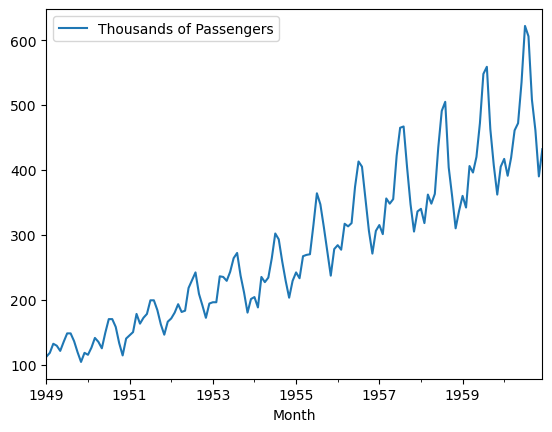

In [28]:
df_airline.plot()

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics: {}".format(result[0]))
    print("p-value:{}".format(result[1]))
    if result[1] <= 0.05:
        print("strong evidance against null hypothesis,reject the null hypothesis")
    else:
        print("weak evidance against null hypothesis,time series hs a unit root it is non stationary")

In [31]:
adf_test(df_airline["Thousands of Passengers"])

ADF Statistics: 0.8153688792060482
p-value:0.991880243437641
weak evidance against null hypothesis,time series hs a unit root it is non stationary


In [32]:
# use techniques difference

df_airline["Passenger first differance"] = df_airline["Thousands of Passengers"]-df_airline["Thousands of Passengers"].shift()

In [33]:
df_airline.head()

,Thousands of Passengers,Passenger first differance
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [34]:
adf_test(df_airline["Passenger first differance"].dropna())

ADF Statistics: -2.8292668241699994
p-value:0.0542132902838255
weak evidance against null hypothesis,time series hs a unit root it is non stationary


In [35]:
df_airline["Passenger second differance"] = df_airline["Passenger first differance"]-df_airline["Passenger first differance"].shift()

In [36]:
adf_test(df_airline["Passenger second differance"].dropna())

ADF Statistics: -16.384231542468505
p-value:2.7328918500142407e-29
strong evidance against null hypothesis,reject the null hypothesis


In [37]:
# 12 months counting

df_airline["Passenger 12 differance"] = df_airline["Thousands of Passengers"]-df_airline["Thousands of Passengers"].shift(12)

In [38]:
adf_test(df_airline["Passenger 12 differance"].dropna())

ADF Statistics: -3.383020726492481
p-value:0.011551493085514952
strong evidance against null hypothesis,reject the null hypothesis


In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

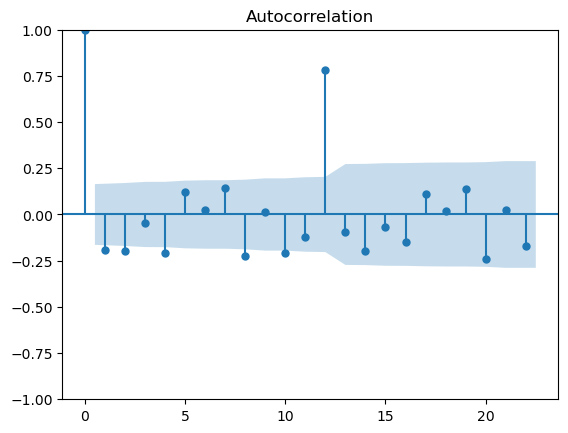

In [40]:
acf = plot_acf(df_airline["Passenger second differance"].dropna())

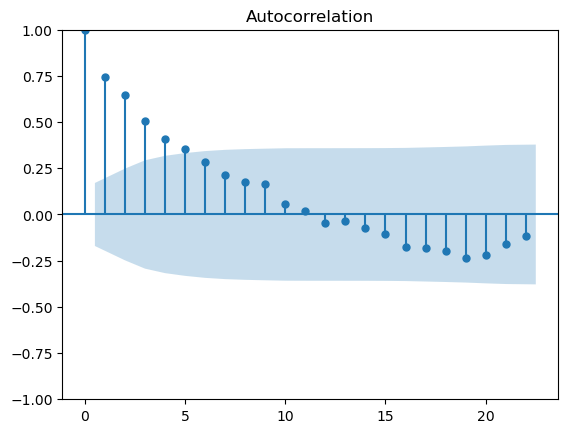

In [41]:
acf12 = plot_acf(df_airline["Passenger 12 differance"].dropna())

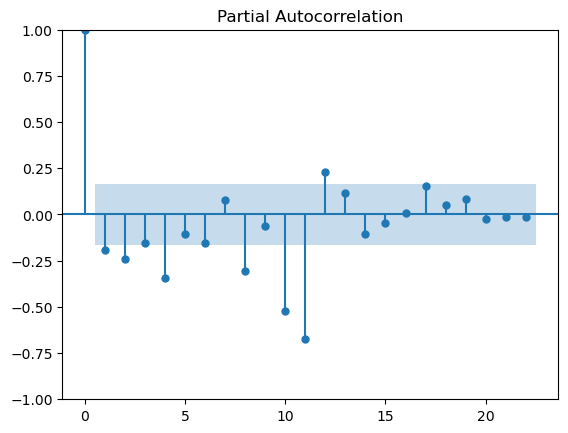

In [42]:
result = plot_pacf(df_airline["Passenger second differance"].dropna())

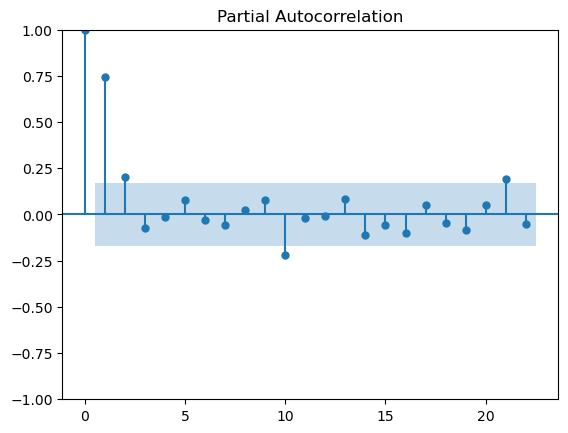

In [43]:
acf12 = plot_pacf(df_airline["Passenger 12 differance"].dropna())

In [44]:
df_airline

,Thousands of Passengers,Passenger first differance,Passenger second differance,Passenger 12 differance
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [45]:
from datetime import datetime,timedelta

In [46]:
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [47]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [48]:
pre_start_date = test_data.index[0]
pre_end_date = test_data.index[-1]

In [49]:
test_data

,Thousands of Passengers,Passenger first differance,Passenger second differance,Passenger 12 differance
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [63]:
# create ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [64]:
# from statsmodels.tsa.arima.model import ARIMA


In [65]:
import statsmodels.api as sm

In [66]:
train_data

,Thousands of Passengers,Passenger first differance,Passenger second differance,Passenger 12 differance
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [89]:
model_ARIMA = ARIMA(train_data["Thousands of Passengers"],order = (0,2,0))

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [90]:
model_Arima_fit = model_ARIMA.fit()

In [91]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(0, 2, 0)   Log Likelihood                -385.792
Date:                     Thu, 28 Sep 2023   AIC                            773.584
Time:                             17:37:30   BIC                            775.991
Sample:                         01-01-1949   HQIC                           774.550
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       714.5858    102.414      6.977      0.000     513.858     915.314
===================================================================================
Ljung-Box (L1) (Q):                   4.59   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.03   Prob(JB):                         0.42
Heteroskedasticity (H):               3.19   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
test_data

,Thousands of Passengers,Passenger first differance,Passenger second differance,Passenger 12 differance
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [93]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [94]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [95]:
pred

1956-01-01     319.0
1956-02-01     360.0
1956-03-01     401.0
1956-04-01     442.0
1956-05-01     483.0
1956-06-01     524.0
1956-07-01     565.0
1956-08-01     606.0
1956-09-01     647.0
1956-10-01     688.0
1956-11-01     729.0
1956-12-01     770.0
1957-01-01     811.0
1957-02-01     852.0
1957-03-01     893.0
1957-04-01     934.0
1957-05-01     975.0
1957-06-01    1016.0
1957-07-01    1057.0
1957-08-01    1098.0
1957-09-01    1139.0
1957-10-01    1180.0
1957-11-01    1221.0
1957-12-01    1262.0
1958-01-01    1303.0
1958-02-01    1344.0
1958-03-01    1385.0
1958-04-01    1426.0
1958-05-01    1467.0
1958-06-01    1508.0
1958-07-01    1549.0
1958-08-01    1590.0
1958-09-01    1631.0
1958-10-01    1672.0
1958-11-01    1713.0
1958-12-01    1754.0
1959-01-01    1795.0
1959-02-01    1836.0
1959-03-01    1877.0
1959-04-01    1918.0
1959-05-01    1959.0
1959-06-01    2000.0
1959-07-01    2041.0
1959-08-01    2082.0
1959-09-01    2123.0
1959-10-01    2164.0
1959-11-01    2205.0
1959-12-01   

In [96]:
residuals

Month
1956-01-01     -35.0
1956-02-01     -83.0
1956-03-01     -84.0
1956-04-01    -129.0
1956-05-01    -165.0
1956-06-01    -150.0
1956-07-01    -152.0
1956-08-01    -201.0
1956-09-01    -292.0
1956-10-01    -382.0
1956-11-01    -458.0
1956-12-01    -464.0
1957-01-01    -496.0
1957-02-01    -551.0
1957-03-01    -537.0
1957-04-01    -586.0
1957-05-01    -620.0
1957-06-01    -594.0
1957-07-01    -592.0
1957-08-01    -631.0
1957-09-01    -735.0
1957-10-01    -833.0
1957-11-01    -916.0
1957-12-01    -926.0
1958-01-01    -963.0
1958-02-01   -1026.0
1958-03-01   -1023.0
1958-04-01   -1078.0
1958-05-01   -1104.0
1958-06-01   -1073.0
1958-07-01   -1058.0
1958-08-01   -1085.0
1958-09-01   -1227.0
1958-10-01   -1313.0
1958-11-01   -1403.0
1958-12-01   -1417.0
1959-01-01   -1435.0
1959-02-01   -1494.0
1959-03-01   -1471.0
1959-04-01   -1522.0
1959-05-01   -1539.0
1959-06-01   -1528.0
1959-07-01   -1493.0
1959-08-01   -1523.0
1959-09-01   -1660.0
1959-10-01   -1757.0
1959-11-01   -1843.0
1959-12

<Axes: ylabel='Density'>

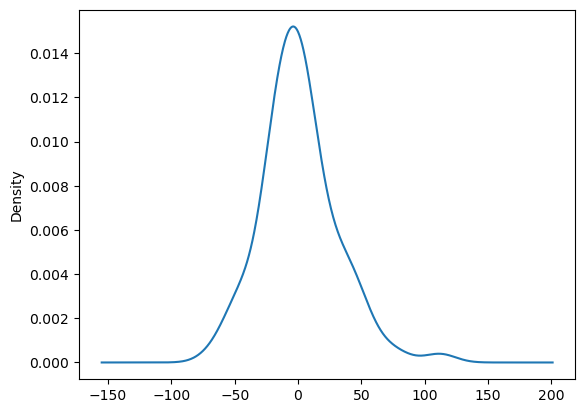

In [97]:
model_Arima_fit.resid.plot(kind='kde')

In [99]:
test_data['Predicted_ARIMA']=pred

C:\Users\Admin\AppData\Local\Temp\ipykernel_6348\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

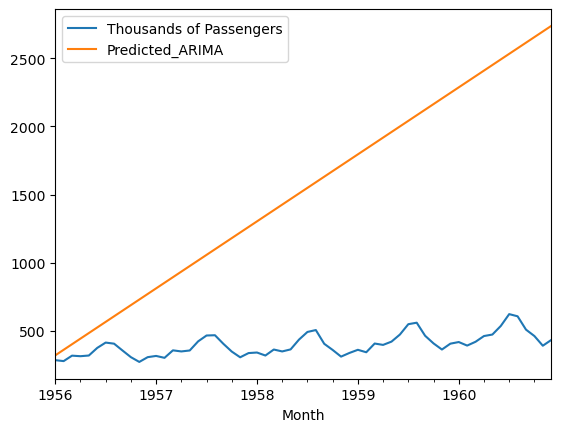

In [100]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

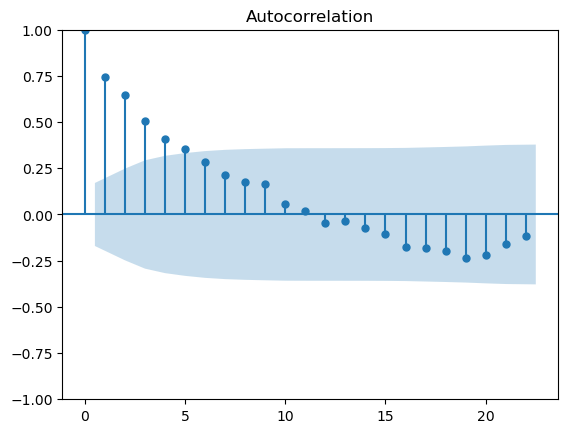

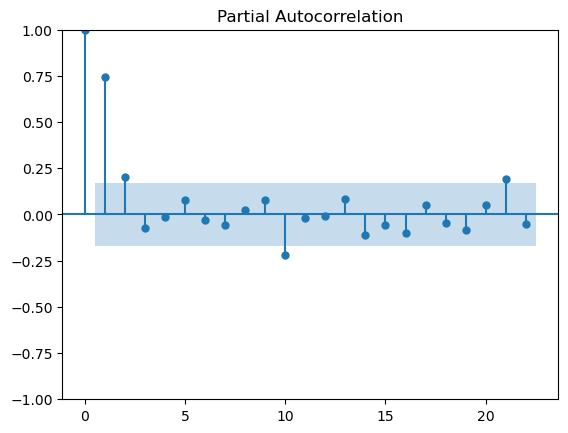

In [102]:
acf12 = plot_acf(df_airline["Passenger 12 differance"].dropna())
pacf12 = plot_pacf(df_airline["Passenger 12 differance"].dropna())

In [103]:
# create SARIMAX model

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [104]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [105]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [106]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Thu, 28 Sep 2023   AIC                            548.481
Time:                                     17:49:55   BIC                            568.970
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5975      0.937      0.637      0.524      -1.240       2.435
ar.L2          0.8311      0.232      3.584      0.000       0.377       1.286
ar.L3         -0.4516      0.894     -0.505      0.613      -2.203       1.300
ma.L1          0.1846      1.166      0.158      0.874      -2.101       2.470
ma.L2         -0.5333      1.264     -0.422      0.673      -3.010       1.943
ma.L3         -0.0988      0.385     -0.257      0.797      -0.853       0.656
ma.L4         -0.1274      0.339     -0.376      0.707      -0.791       0.536
ma.L5          0.2470      0.357      0.691      0.489      -0.453       0.947
sigma2        87.7359     81.441      1.077      0.281     -71.885     247.357
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
test_data.tail()

,Thousands of Passengers,Passenger first differance,Passenger second differance,Passenger 12 differance,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,2574.0
1960-09-01,508.0,-98.0,-82.0,45.0,2615.0
1960-10-01,461.0,-47.0,51.0,54.0,2656.0
1960-11-01,390.0,-71.0,-24.0,28.0,2697.0
1960-12-01,432.0,42.0,113.0,27.0,2738.0


In [108]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [109]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

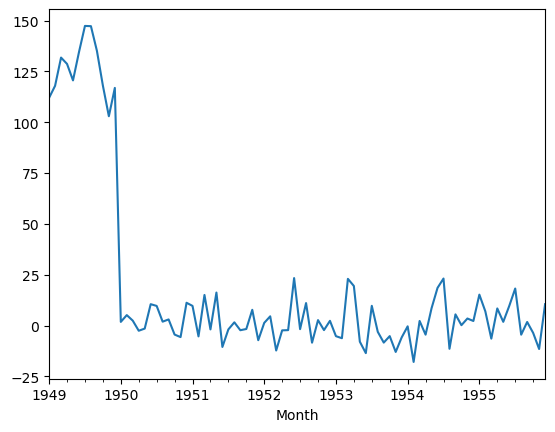

In [110]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

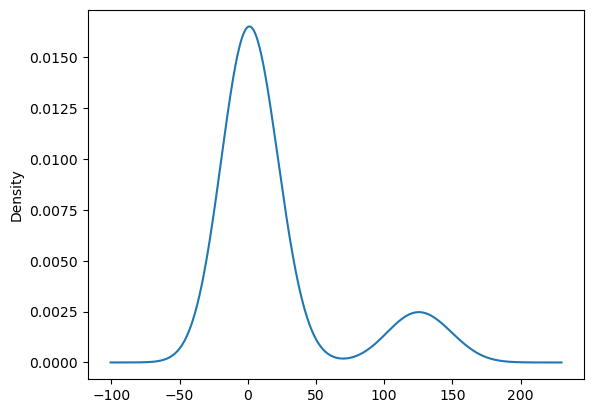

In [111]:
model_SARIMA_fit.resid.plot(kind='kde')

In [112]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Admin\AppData\Local\Temp\ipykernel_6348\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [113]:
test_data

,Thousands of Passengers,Passenger first differance,Passenger second differance,Passenger 12 differance,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,319.0,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,360.0,NaN
1956-03-01,317.0,40.0,47.0,50.0,401.0,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,442.0,NaN
1956-05-01,318.0,5.0,9.0,48.0,483.0,NaN
1956-06-01,374.0,56.0,51.0,59.0,524.0,NaN
1956-07-01,413.0,39.0,-17.0,49.0,565.0,403.400187
1956-08-01,405.0,-8.0,-47.0,58.0,606.0,385.073275
1956-09-01,355.0,-50.0,-42.0,43.0,647.0,349.448947


<Axes: xlabel='Month'>

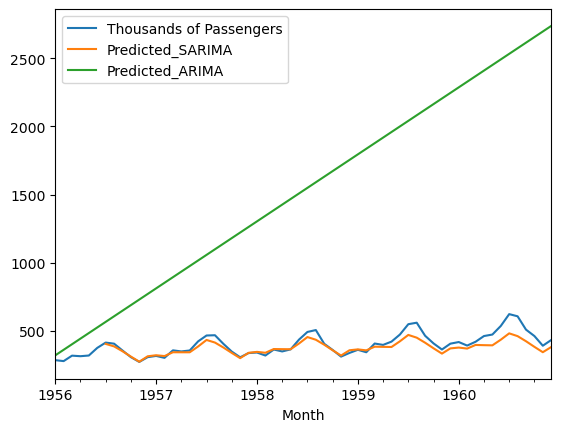

In [114]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()